import matplotlib.pyplot as plt
import numpy as np
import json
plt.ion()



## Inital parameters

In [10]:
P_n = 100e3 # Nominal power (W)
Omega_n = 30*2*np.pi/60 # velocidad nominal (rad/s)
Freq_n = 25 # nominal frequency (Hz)

### Cálculos

In [3]:
Tau_n = P_n/Omega_n
print(f'Par nominal: Tau_n = {Tau_n/1e3:0.2f} kNm')

Par nominal: Tau_n = 31.83 kNm


In [4]:
sigma = 40e3 # valor supuesto (Pa)
V_r = Tau_n/(2*sigma) # volumen del rotor

Length = 0.3 # Stack length (m), valor supuesto
D_r = 2*np.sqrt(V_r/(np.pi*Length)) # V = L*pi*(D/2)**2
R_r = D_r/2*1e3

print(f'Rotor diameter: D_r = {D_r:0.3f} m ({D_r*100:0.2f} cm)')

x = 0.85 # x =R_r/R_s
R_s = R_r/x

print(f'Stator outer radius [mm]: {R_s:0.3f}')
print(f'Airgap radius [mm]: {R_r:0.3f}')

print(f'Stack length [mm]: {Length*1e3:0.3f}')


Rotor diameter: D_r = 1.299 m (129.95 cm)
Stator outer radius [mm]: 764.409
Airgap radius [mm]: 649.747
Stack length [mm]: 300.000


In [ ]:

# omega = 2*pi*freq/N_pp
N_pp = np.ceil(2*np.pi*Freq_n)/Omega_n
print(f'Number of pole pairs: {N_pp:0.0f}')

Number of pole pairs: 50


Set the following values in the **Main Data** tab:
- Type of rotor to SPM
- Number of pole pairs (50)
- Number of slots/pole/phase (1)
- Airgap thickness [mm] (4)  
- Stator outer radius [mm] (850)
- Airgap radius [mm]  (775)
- Stack length [mm]  (300) 

Set the following values in the **Geometry** tab:
- Barriers width [mm]  (10)

Set the following values in the **Windings** tab:
- Turns in series per phase (500)

In [6]:
U_n = 690.0 # V  
FP = 0.9 # power factor (Manufacturer)

I_n = P_n/(np.sqrt(3)*U_n*FP)

print(f'Phase current [A]: I_n = {I_n:0.2f} A')


Phase current [A]: I_n = 92.97 A


Si la corriente es baja, disminuir las espiras.


In [7]:
V_dc_n = 720*690/400
V_dc_n

1242.0

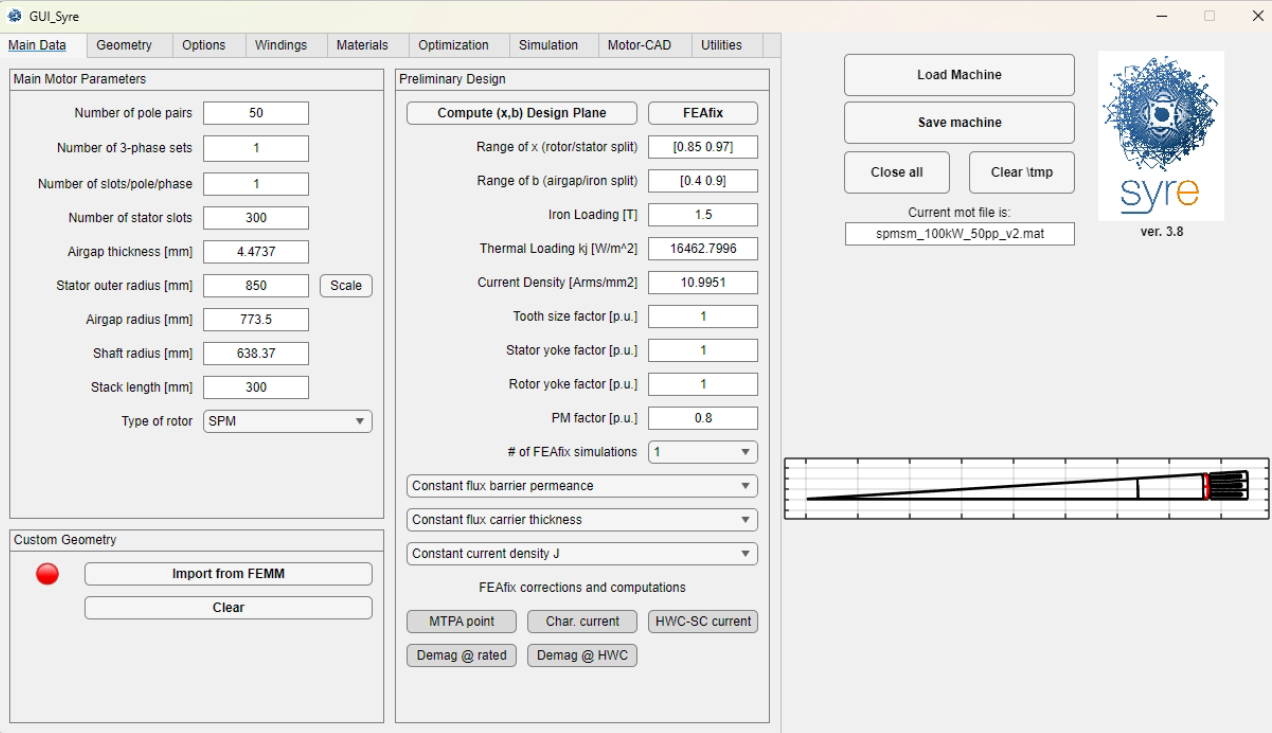

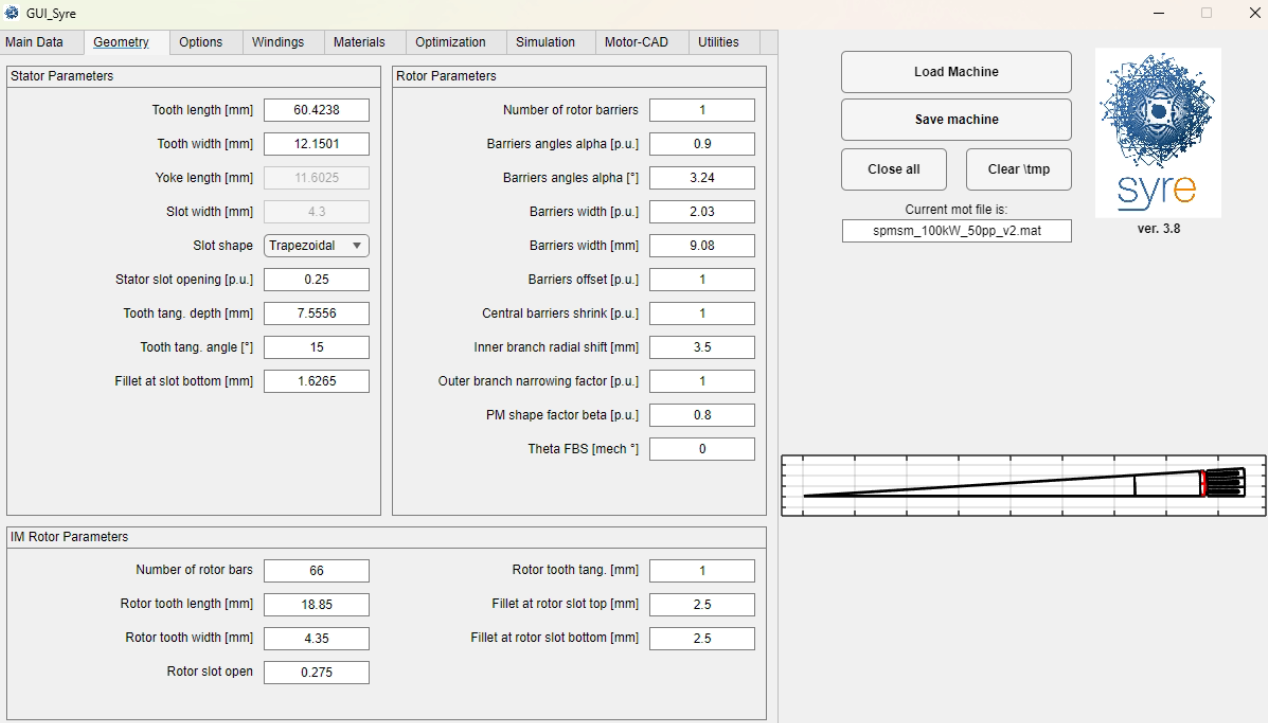

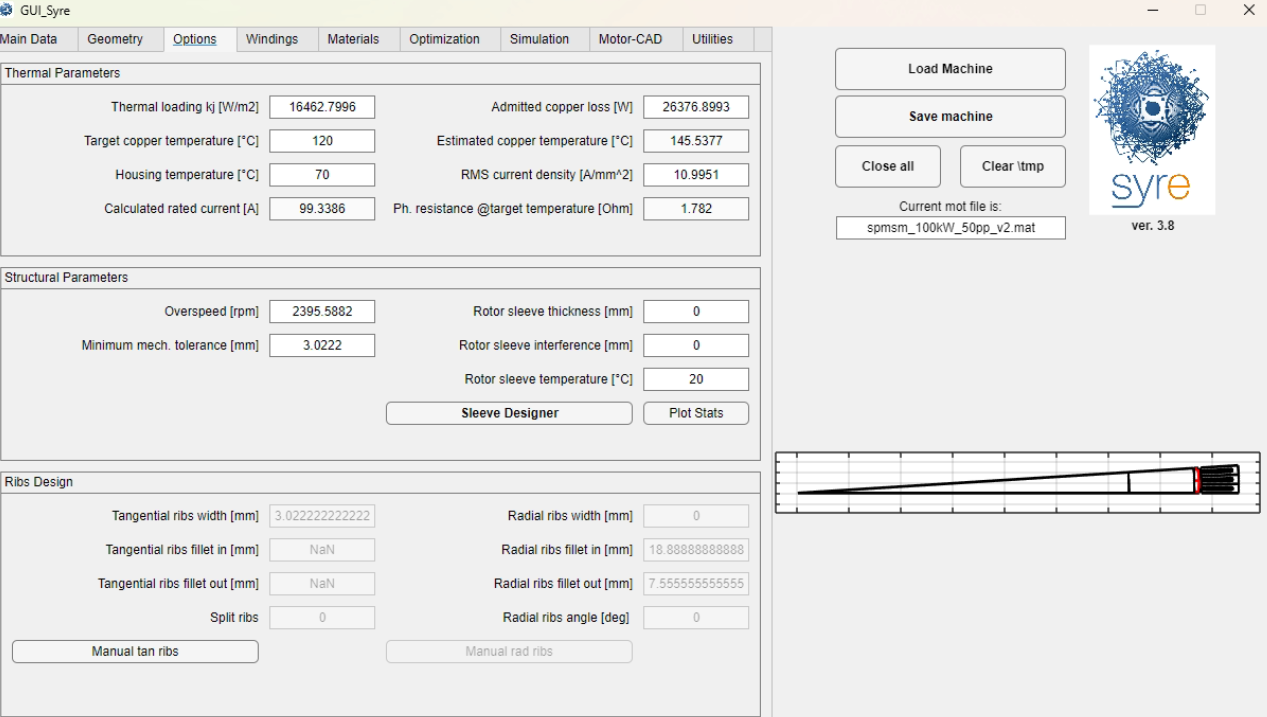

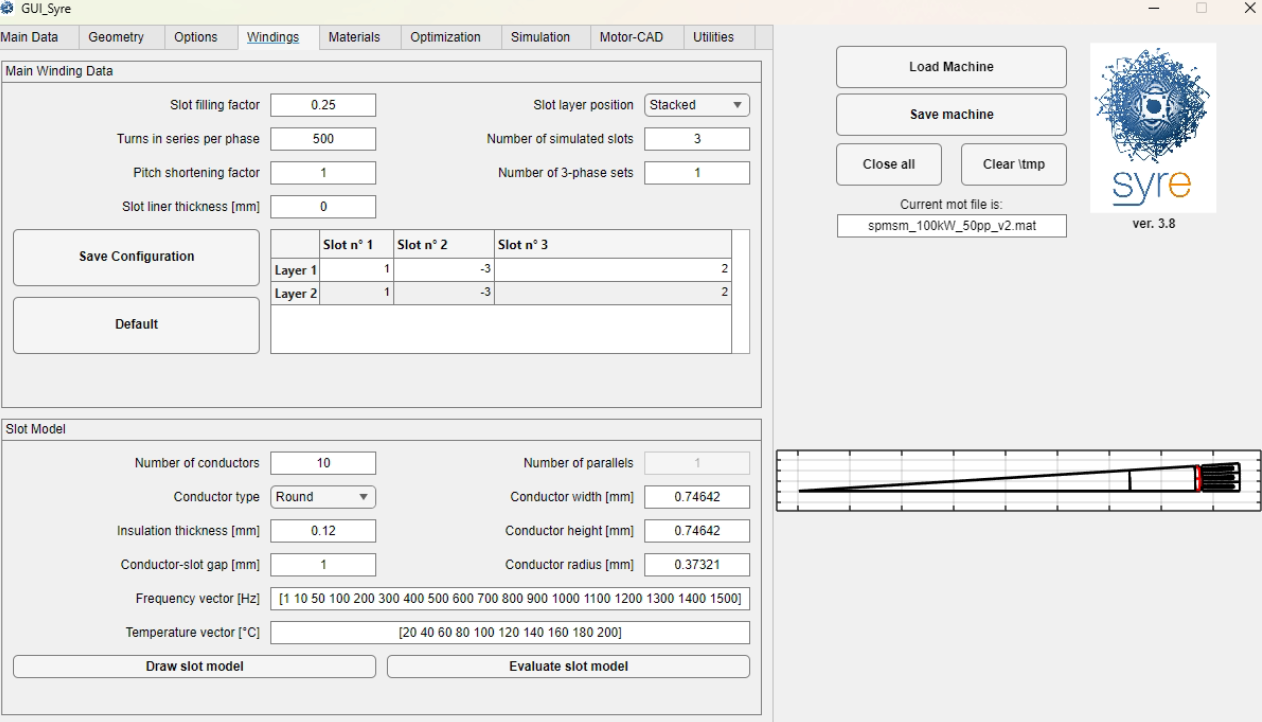

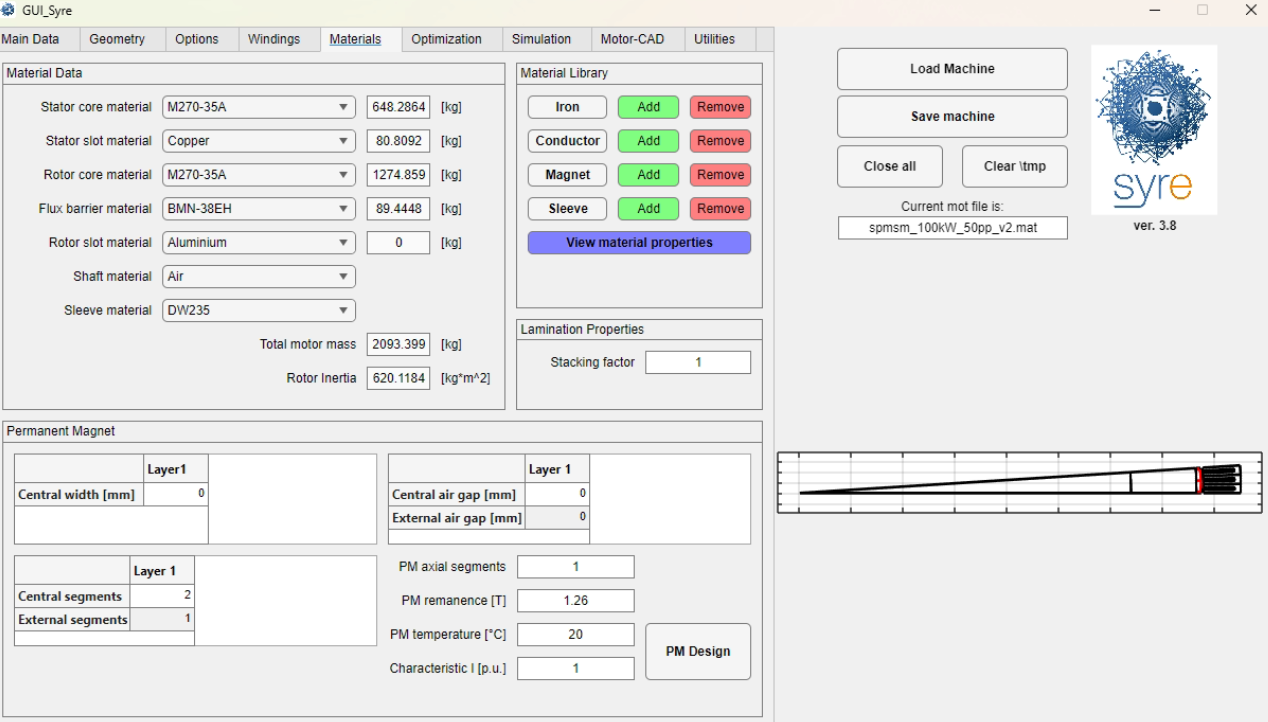

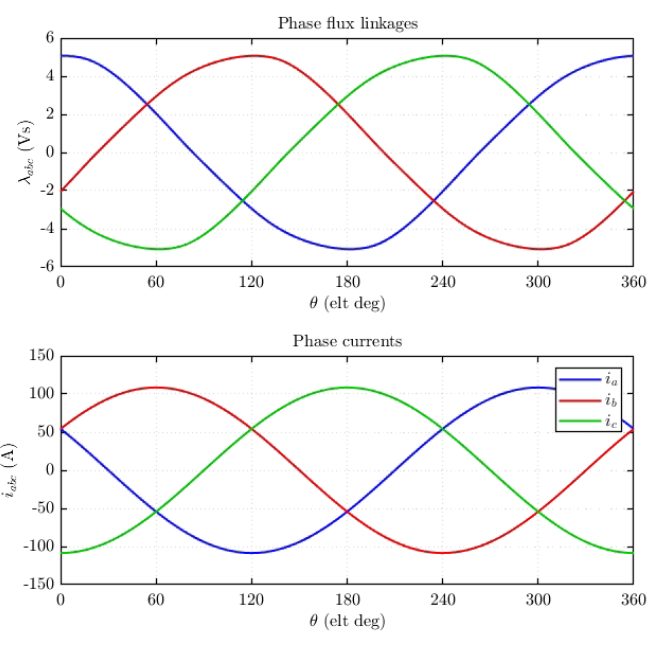
Ç

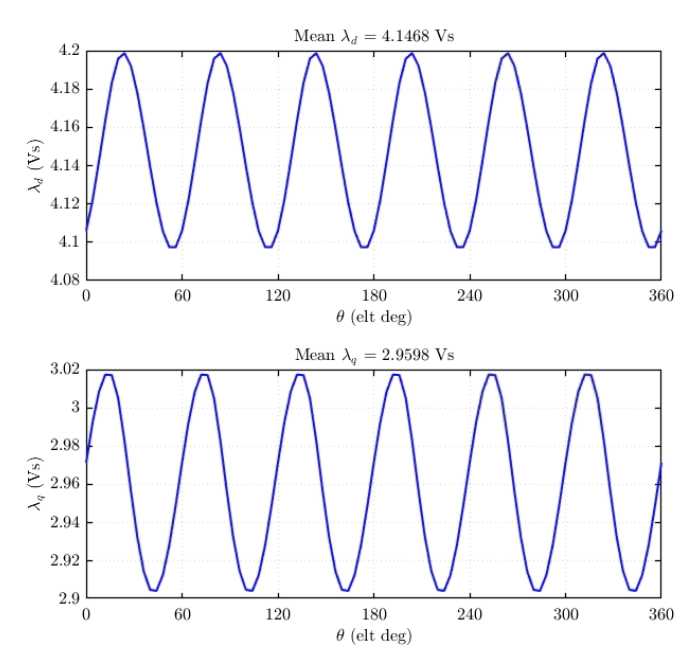

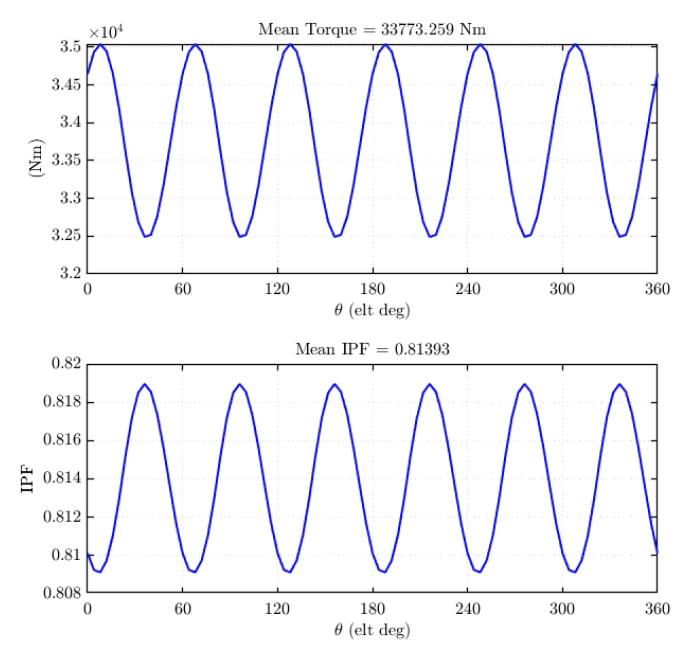

In [8]:
I_n = 2000 # A (Manufacturer)
U_n = 690.0 # V (Manufacturer)
FP = 0.96 # power factor (Manufacturer)
P_sn = np.sqrt(3)*U_n*I_n*FP
print(f'Input power (manufacturer): P_sn = {P_sn:0.1f} W')

rend = P_n/P_sn 
print(f'Rendimiento (manufacturer): rend = {rend*100:0.1f} %  (man. 90.7%)')


Input power (manufacturer): P_sn = 2294620.9 W
Rendimiento (manufacturer): rend = 4.4 %  (man. 90.7%)


In [9]:
data = {'manufacturer':{'I_nom':I_n, 'P_mec_nom':P_n, 'P_s_nom':P_sn,
                        'rend':rend,'pf':FP,'U_nom':U_n,'R_s':3.31,
                        'L_d':30.3e3,'L_q':109e3}}

file = 'design.json'
with open(file,'w') as fobj:
    fobj.write(json.dumps(data))